##### `KMeans` is computationally expensive, thefore `MiniBatch KMeans` is used to speed up k-means clustering by orders of magnitude, provided there are good initial conditions

In [1]:
import numpy as np 
from sklearn.datasets import make_blobs
blobs, labels = make_blobs(int(1e6),3)

In [2]:
from sklearn.cluster import KMeans, MiniBatchKMeans
kmeans = KMeans(n_clusters=3)
minibatch = MiniBatchKMeans(n_clusters=3)

In [3]:
%time kmeans.fit(blobs)

CPU times: total: 6.69 s
Wall time: 2.2 s


KMeans(n_clusters=3)

In [4]:
%time minibatch.fit(blobs)

CPU times: total: 469 ms
Wall time: 866 ms


MiniBatchKMeans(n_clusters=3)

Next, difference in clustering performance

In [5]:
kmeans.cluster_centers_

array([[-7.02147508,  7.12828475,  4.7777995 ],
       [ 5.51270648, -5.82676998, -7.95003547],
       [-4.36047947,  1.70410368, -1.80212631]])

In [6]:
minibatch.cluster_centers_

array([[-7.01803519,  7.12695946,  4.78090135],
       [ 5.51368034, -5.8242273 , -7.94952468],
       [-4.36635604,  1.70544164, -1.80243265]])

In [7]:
#Looking at the distance between the first cluster centers

from sklearn.metrics import pairwise 
pairwise.pairwise_distances(kmeans.cluster_centers_[0].reshape(1,-1), minibatch.cluster_centers_[0].reshape(1,-1))


array([[0.00481775]])

In [8]:
#Next, look at the diagonals - it contains the cluster center differences 

np.diag(pairwise.pairwise_distances(kmeans.cluster_centers_, minibatch.cluster_centers_))

array([0.00481775, 0.0027703 , 0.00603474])

##### In `MiniBatch KMeans`, batches are iterated through to find the batch mean; for the next iteration, the prior batch mean is updated in relation to the current iteration.

##### `batch_size` parameter determines hwo large the batches should be. 

In [9]:
#Setting batch_size to the same size as dataset size 

minibatch = MiniBatchKMeans(batch_size=len(blobs), n_clusters=3)
%time minibatch.fit(blobs)

CPU times: total: 13.6 s
Wall time: 3.24 s


MiniBatchKMeans(batch_size=1000000, n_clusters=3)

Therefore, `batch_size` should be tried and tested accordingly

#### Quantizing and image with K-Means

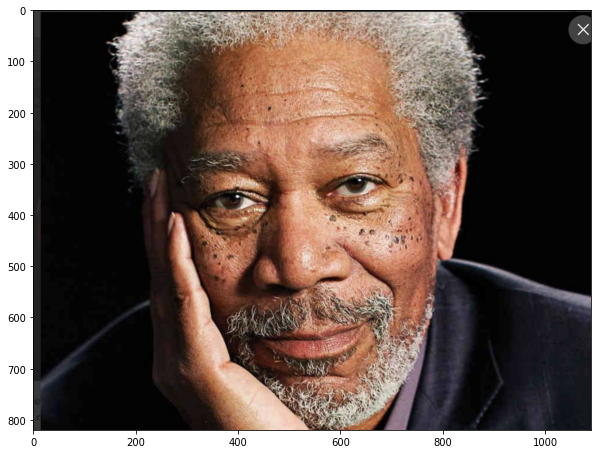

In [12]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import imread
%matplotlib inline 

img = imread("morgan.png")
plt.figure(figsize=(10,8))
plt.imshow(img)

In [13]:
img.shape

(820, 1090, 4)

In [14]:
#Before, lets re-shape our array
x, y, z = img.shape 
long_img = img.reshape(x*y,z)
long_img.shape

(893800, 4)

In [15]:
#Starting clustering with Sihouette Distance 

from sklearn import cluster 
k_means = cluster.KMeans(n_clusters=4)
k_means.fit(long_img) 
centers = k_means.cluster_centers_
centers

array([[0.0426335 , 0.0358755 , 0.03747237, 1.        ],
       [0.8287434 , 0.68492573, 0.5995904 , 1.        ],
       [0.2967149 , 0.21329083, 0.18616064, 1.        ],
       [0.6508374 , 0.46064085, 0.36872113, 1.        ]], dtype=float32)

In [17]:
labels = k_means.labels_
labels

array([2, 2, 2, ..., 0, 0, 0])

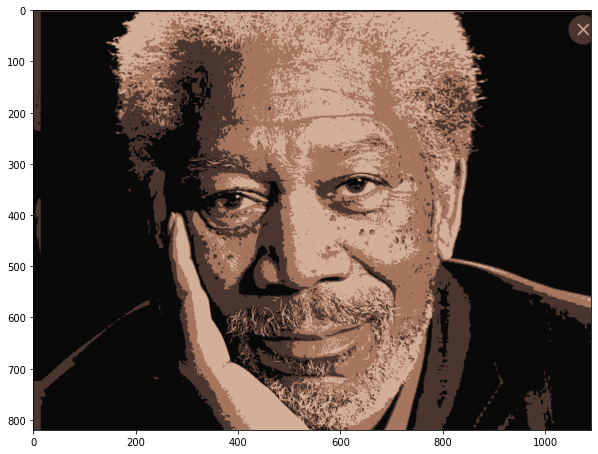

In [18]:
plt.figure(figsize=(10,8))
plt.imshow(centers[labels].reshape(x,y,z))
